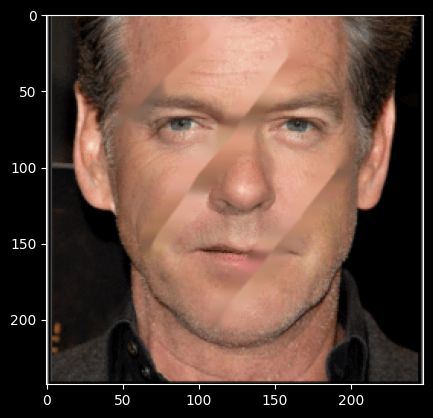

In [11]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("./Inpainting-Man.bmp")

# Create a mask (black for inpainting region, white for preserved areas)
mask = cv2.imread('mask2.png', 0)

# Draw the inpainting region on the mask (using any drawing tool)
# Black color indicates the region to be inpainted

# Inpainting algorithm selection (choose one)
# inpaint_method = cv2.INPAINT_TELEA  # Fast Marching Method
inpaint_method = cv2.INPAINT_NS    # Navier-Stokes Method (might be slower)

# Inpaint the image
result = cv2.inpaint(image, mask, 3, inpaint_method)

# Display or save the inpainted image
import matplotlib.pyplot as plt
result=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(result)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'Inpainting-Man.bmp'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color ranges for the marks (pink, yellow, green)
lower_pink = np.array([160, 100, 100])
upper_pink = np.array([180, 255, 255])
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
lower_green = np.array([40, 100, 100])
upper_green = np.array([70, 255, 255])

# Create masks for each color
mask_pink = cv2.inRange(hsv_image, lower_pink, upper_pink)
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Combine the masks
mask = cv2.bitwise_or(mask_pink, mask_yellow)
mask = cv2.bitwise_or(mask, mask_green)

# Refine the mask with morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Try both inpainting methods
inpainted_image_telea = cv2.inpaint(image, mask, 5, cv2.INPAINT_TELEA)
inpainted_image_ns = cv2.inpaint(image, mask, 5, cv2.INPAINT_NS)

# Convert BGR images to RGB for displaying
inpainted_image_telea_rgb = cv2.cvtColor(inpainted_image_telea, cv2.COLOR_BGR2RGB)
inpainted_image_ns_rgb = cv2.cvtColor(inpainted_image_ns, cv2.COLOR_BGR2RGB)

# Plot the original and inpainted images


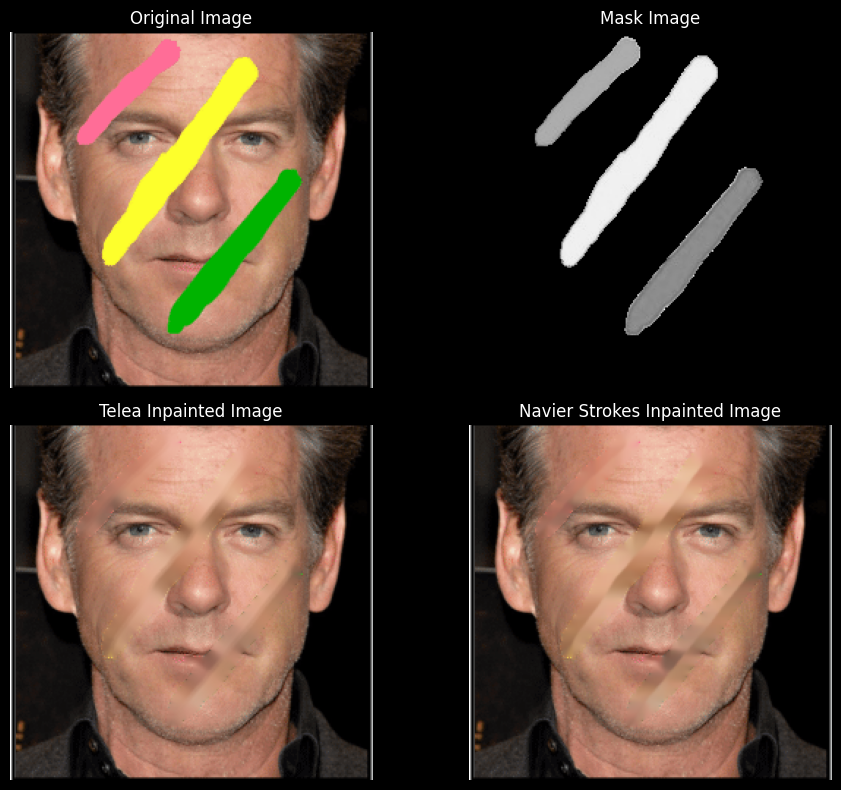

In [19]:
# Create a figure for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=False)

axes[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original Image')
axes[0,0].axis("off")

axes[0,1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
axes[0,1].set_title('Mask Image')
axes[0,1].axis("off")


# Days left KDE plot
axes[1,0].imshow(cv2.cvtColor(inpainted_image_telea, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Telea Inpainted Image')
axes[1,0].axis("off")


axes[1,1].imshow(cv2.cvtColor(inpainted_image_ns, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Navier Strokes Inpainted Image')
axes[1,1].axis("off")


plt.tight_layout()
plt.show()